<a href="https://colab.research.google.com/github/mouhaxp/ACE_Framework/blob/main/StockMarketPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

stock_data = yf.download('DAC', start='2014-02-21', end='2024-02-21')
stock_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-02-21,86.800003,90.440002,86.379997,88.199997,79.023415,1179
2014-02-24,88.339996,90.440002,86.660004,89.599998,80.277763,2021
2014-02-25,89.599998,90.160004,86.660004,88.480003,79.274292,1571
2014-02-26,89.320000,89.739998,86.800003,89.040001,79.776031,1600
2014-02-27,88.199997,89.320000,85.120003,87.360001,78.270813,2164
...,...,...,...,...,...,...
2024-02-13,75.989998,76.440002,74.970001,75.449997,75.449997,110400
2024-02-14,72.650002,74.949997,72.019997,72.570000,72.570000,189800
2024-02-15,72.360001,72.849998,71.660004,72.040001,72.040001,128700


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1,1))

In [ ]:
import numpy as np

def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [ ]:
time_step = 100
X, y = create_dataset(scaled_data, time_step)

train_size=0.8
X_train, X_test = X[:int(X.shape[0]*train_size)], X[int(X.shape[0]*train_size):]
y_train, y_test = y[:int(y.shape[0]*train_size)], y[int(y.shape[0]*train_size):]

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=64))
model.add(Dense(units=64))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
31/31 [==============================] - 9s 188ms/step - loss: 0.0299
Epoch 2/10
31/31 [==============================] - 4s 125ms/step - loss: 0.0017
Epoch 3/10
31/31 [==============================] - 4s 136ms/step - loss: 0.0012
Epoch 4/10
31/31 [==============================] - 5s 151ms/step - loss: 0.0011
Epoch 5/10
31/31 [==============================] - 4s 116ms/step - loss: 0.0011
Epoch 6/10
31/31 [==============================] - 4s 116ms/step - loss: 0.0010
Epoch 7/10
31/31 [==============================] - 4s 135ms/step - loss: 9.6962e-04
Epoch 8/10
31/31 [==============================] - 4s 126ms/step - loss: 9.4256e-04
Epoch 9/10
31/31 [==============================] - 4s 117ms/step - loss: 8.8725e-04
Epoch 10/10
31/31 [==============================] - 4s 123ms/step - loss: 8.4802e-04


In [ ]:
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

16/16 [==============================] - 2s 28ms/step - loss: 9.9067e-04
Test Loss: 0.000990670407190919


In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 1s 27ms/step


In [ ]:
original_data = stock_data['Close'].values
predicted_data = np.empty_like(original_data)
predicted_data[:] = np.nan
predicted_data[-len(predictions):] = predictions.reshape(-1)

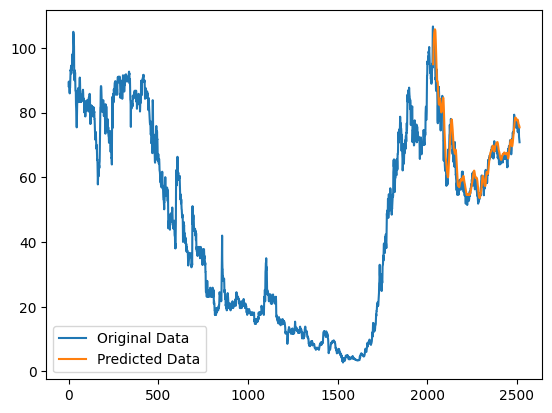

In [ ]:
import matplotlib.pyplot as plt

plt.plot(original_data, label='Original Data')
plt.plot(predicted_data, label='Predicted Data')
plt.legend()
plt.show()

In [ ]:
new_predictions = model.predict(X_test[-90:])
new_predictions = scaler.inverse_transform(new_predictions)

predicted_data = np.append(predicted_data, new_predictions)
predicted_data[-90:]

3/3 [==============================] - 0s 30ms/step


array([67.23042297, 67.41574097, 67.57076263, 67.65789032, 67.69841766,
       67.67560577, 67.62614441, 67.56473541, 67.46799469, 67.36478424,
       67.27288055, 67.23451233, 67.20475769, 67.17167664, 67.13500214,
       67.18338776, 67.2347641 , 67.28377533, 67.4285202 , 67.54155731,
       67.55687714, 67.46051025, 67.14164734, 66.74717712, 66.31491852,
       65.88716888, 65.83177185, 66.12194824, 66.48643494, 66.96652985,
       67.525177  , 68.12732697, 68.74450684, 69.29756927, 69.77616119,
       70.15694427, 70.39325714, 70.65563202, 71.0019455 , 71.37023163,
       71.57131195, 71.59832001, 71.4230957 , 71.15084076, 70.75131226,
       70.30122375, 69.90061951, 69.61210632, 69.62767029, 69.811203  ,
       70.18994141, 70.6552124 , 71.27005768, 71.98023987, 72.67517853,
       73.32233429, 73.86634827, 74.34614563, 74.78203583, 75.30469513,
       75.94513702, 76.75601196, 77.4906311 , 78.00522614, 78.3341217 ,
       78.48336029, 78.49069977, 78.45077515, 78.39910889, 78.32

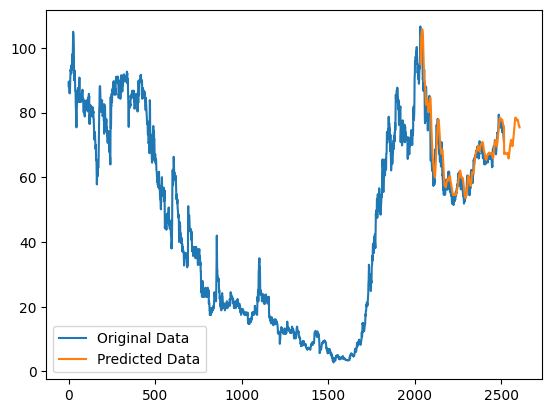

In [ ]:
plt.plot(original_data, label='Original Data')
plt.plot(predicted_data, label='Predicted Data')
plt.legend()
plt.show()